In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

import scipy.stats as st

sns.set_theme()

In [2]:
files = {
    'seq': 'results/mandelbrot_seq.csv',
    'pth': 'results/mandelbrot_pth.csv',
    'omp': 'results/mandelbrot_omp.csv'
}

In [3]:
def read_stats(path):
    return pd.read_csv(path)

In [4]:
stats = dict()

for prog, path in files.items():
    stats[prog] = read_stats(path)

In [5]:
# COLUMNS = ['io_time', 'computation_time', 'memory_time', 'total_time']

# def compute_mean(stats, group_by=['region', 'size']):
#     agg_df = stats.groupby(by=group_by).agg(['mean', 'std'])
#     agg_df.columns = agg_df.columns.map('_'.join)
#     agg_df.reset_index(inplace=True)
    
#     for col in COLUMNS:
#         if col in stats:
#             agg_df[col + '_ci'] = 0.95 * agg_df[col + '_std'] / np.sqrt(10)
    
#     return agg_df

In [6]:
# df = compute_mean(stats['seq'])

# plt.figure(figsize=(8,6))
# sns.lineplot(x='size', y='computation_time_mean', hue="region", data=df)

# plt.xlabel("Year", size=14)
# plt.ylabel("Median Life Expectancy", size=14)
# plt.savefig("Multi_group_lplot_stats(stats['omp'], 'size', 'computation_time', 'Tempo de execução para a versão OpenMP (seg)', 'Tamanho da Entrada', 'Tempo (s)')

In [7]:
# sns.lineplot(data=stats['seq'], x='size', y='computation_time', hue='region')

In [8]:
# sns.lineplot(data=stats['omp'], x='threads', y='computation_time', hue='region')

In [9]:
def plot_stats(df, x, y, title, xlabel, ylabel):
    fig, ax1 = plt.subplots(figsize=(10,8))
    
    sp1 = sns.lineplot(data=df, x=x, y=y, hue='region', ax=ax1, palette='deep')
    ax1.set_title(title)
    ax1.set_xlabel(xlabel)
    ax1.set_ylabel(ylabel)
    
    legend = ax1.get_legend()
    handles = legend.legendHandles
    legend.remove()
    ax1.legend(
        handles,
        ['Full Picture', 'Seahorse Valley', 'Elephant Valley', 'Triple Spiral Valley'],
        title='Região'
    )

    plt.savefig(f"{title}.png".replace('/',''), format='png', dpi=150)

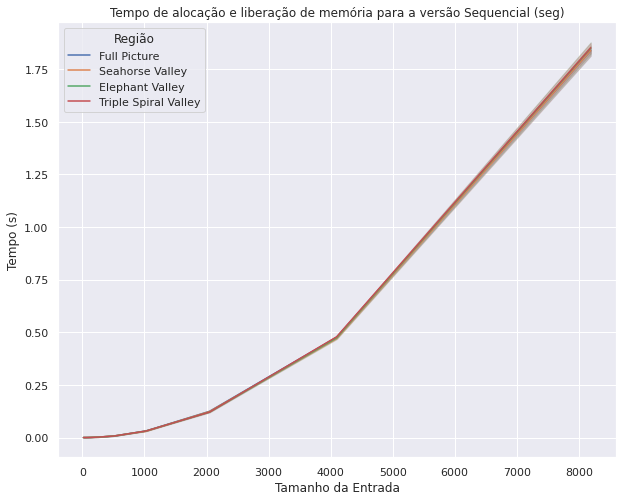

In [10]:
plot_stats(stats['seq'], 'size', 'memory_time', 'Tempo de alocação e liberação de memória para a versão Sequencial (seg)', 'Tamanho da Entrada', 'Tempo (s)')

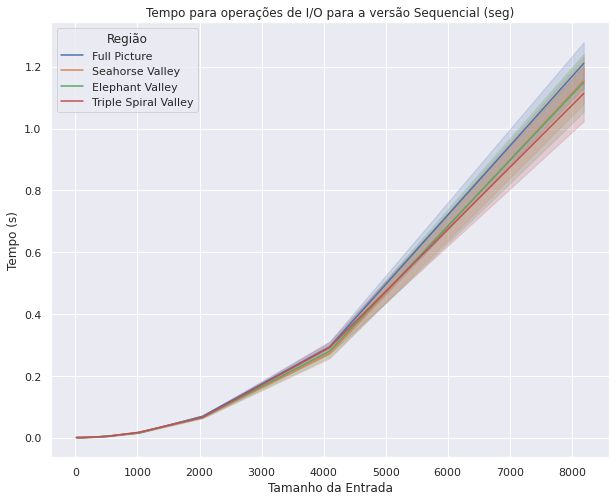

In [11]:
plot_stats(stats['seq'], 'size', 'io_time', 'Tempo para operações de I/O para a versão Sequencial (seg)', 'Tamanho da Entrada', 'Tempo (s)')

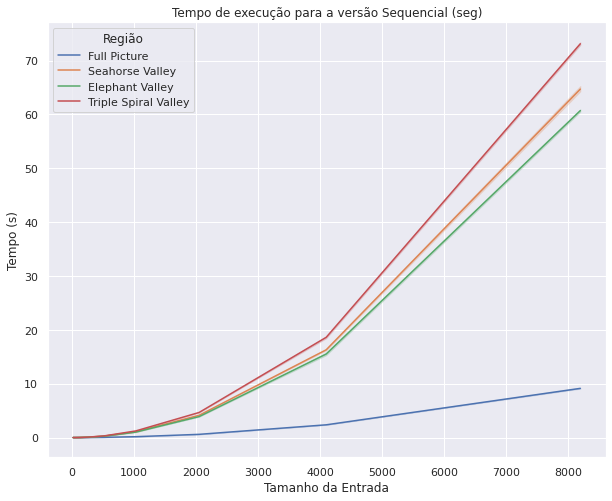

In [12]:
plot_stats(stats['seq'], 'size', 'computation_time', 'Tempo de execução para a versão Sequencial (seg)', 'Tamanho da Entrada', 'Tempo (s)')

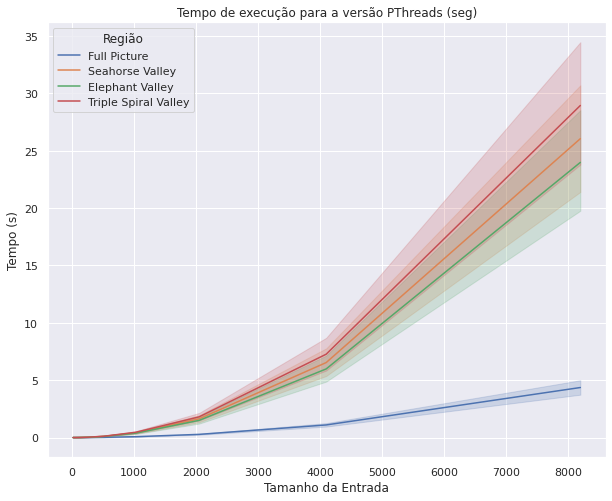

In [13]:
plot_stats(stats['pth'], 'size', 'computation_time', 'Tempo de execução para a versão PThreads (seg)', 'Tamanho da Entrada', 'Tempo (s)')

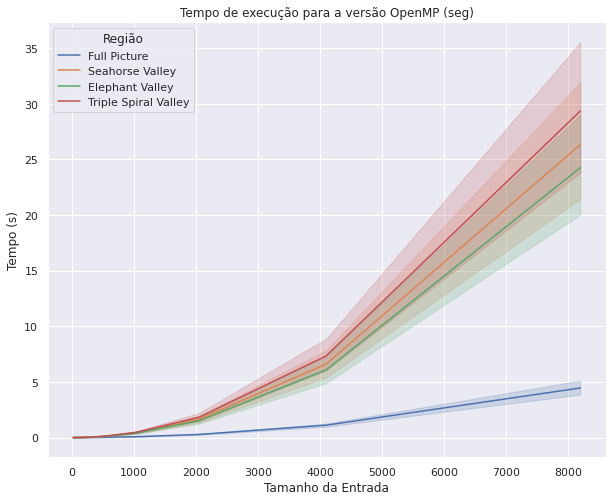

In [14]:
plot_stats(stats['omp'], 'size', 'computation_time', 'Tempo de execução para a versão OpenMP (seg)', 'Tamanho da Entrada', 'Tempo (s)')

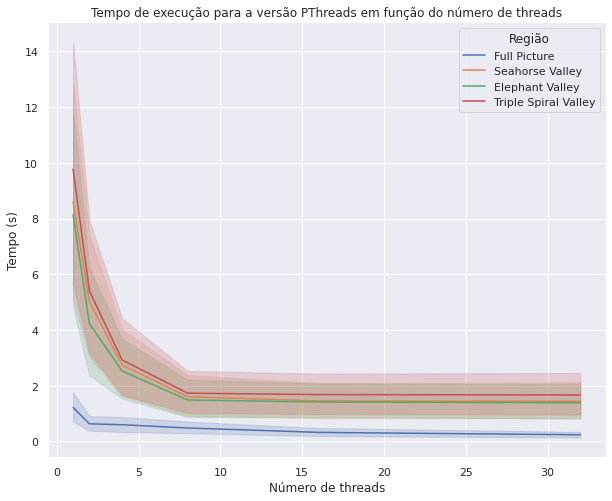

In [15]:
plot_stats(stats['pth'], 'threads', 'computation_time', 'Tempo de execução para a versão PThreads em função do número de threads', 'Número de threads', 'Tempo (s)')

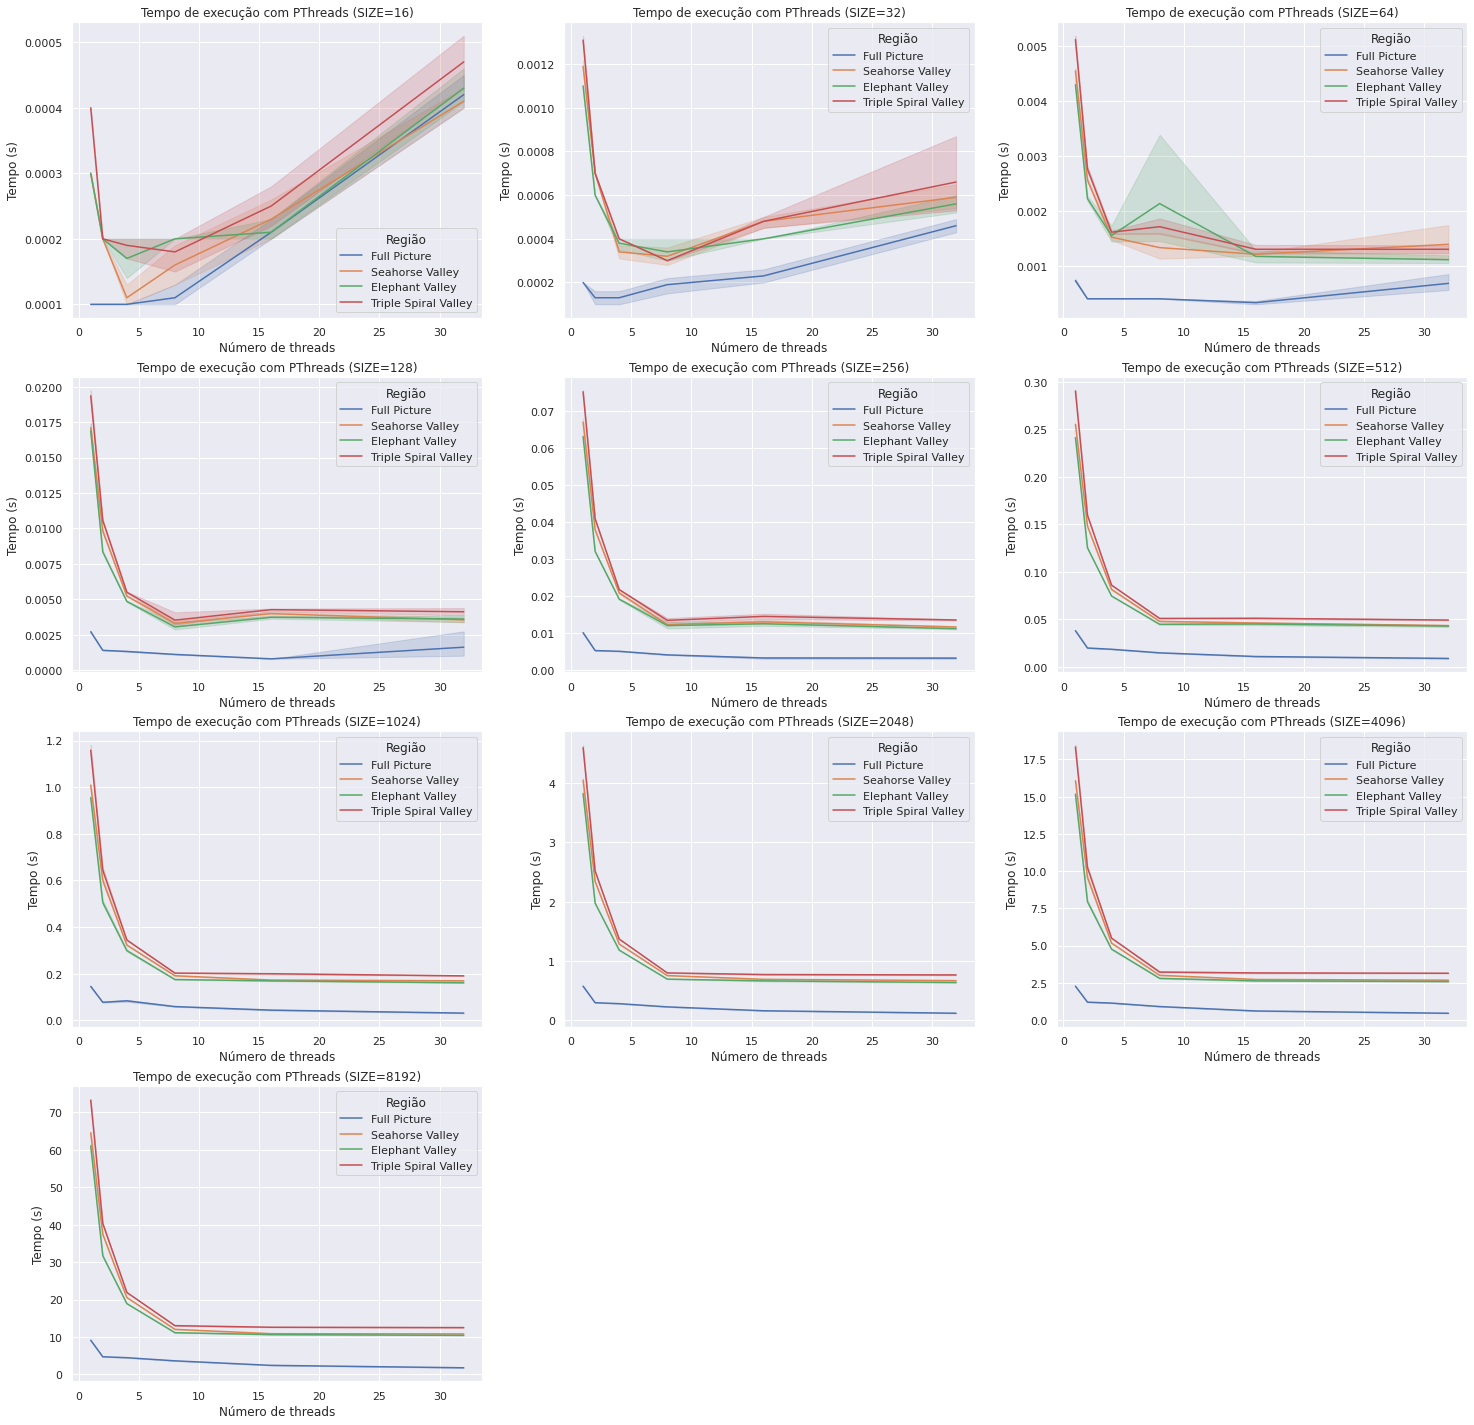

In [38]:
fig, axs = plt.subplots(4, 3, figsize=(25, 25))
axs[3, 1].axis('off')
axs[3, 2].axis('off')

for size in range(4, 14):
    df = stats['pth'][stats['pth']['size'] == 2**size]
    
    i, j = (size-4)//3, (size-4)%3
    
    sp1 = sns.lineplot(data=df, x='threads', y='computation_time', hue='region', ax=axs[i, j], palette='deep')
    axs[i,j].set_title(f'Tempo de execução com PThreads (SIZE={2**size})')
    axs[i,j].set_xlabel('Número de threads')
    axs[i,j].set_ylabel('Tempo (s)')
    legend = axs[i,j].get_legend()
    handles = legend.legendHandles
    legend.remove()
    axs[i,j].legend(
        handles,
        ['Full Picture', 'Seahorse Valley', 'Elephant Valley', 'Triple Spiral Valley'],
        title='Região'
    )

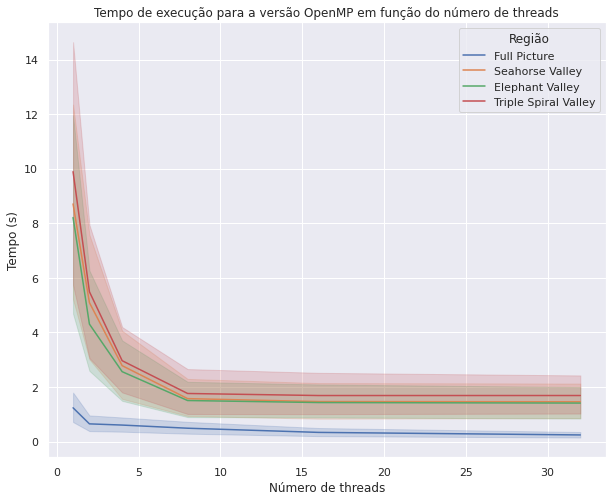

In [37]:
plot_stats(stats['omp'], 'threads', 'computation_time', 'Tempo de execução para a versão OpenMP em função do número de threads', 'Número de threads', 'Tempo (s)')

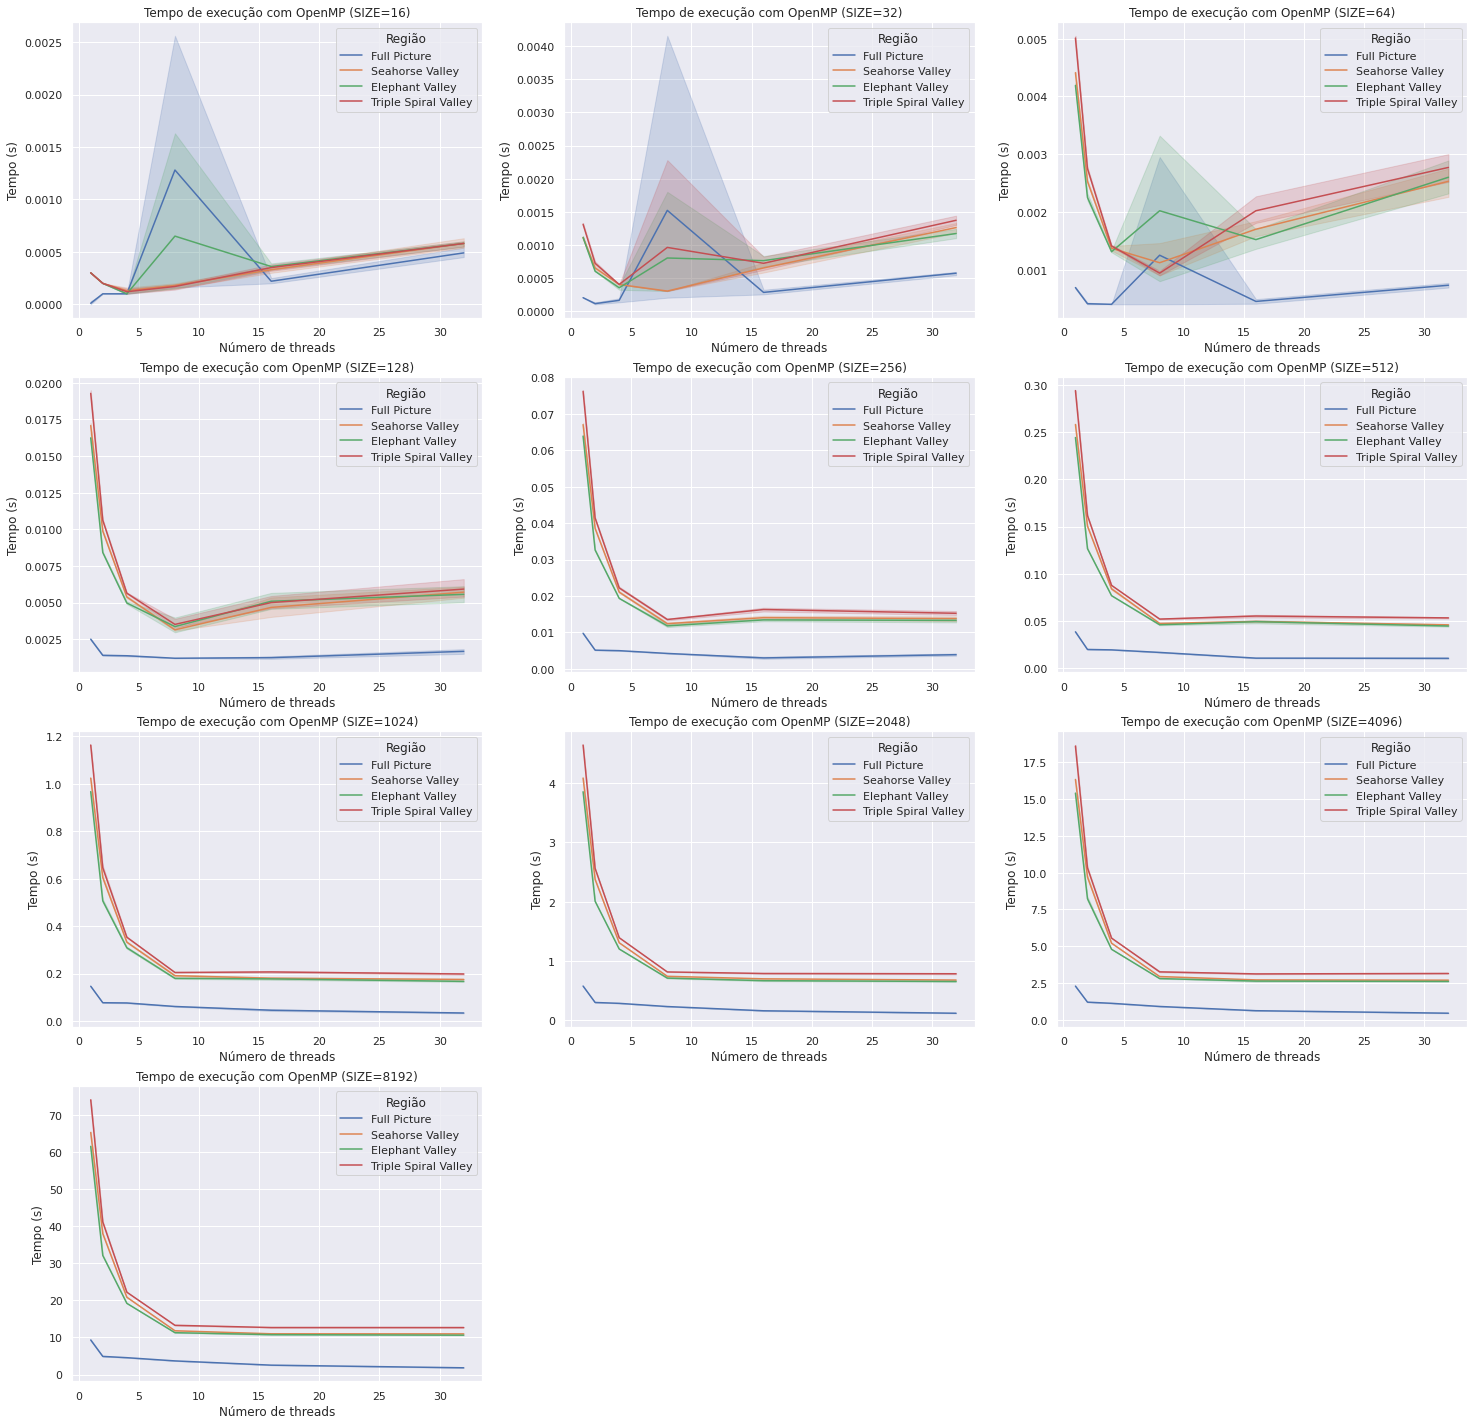

In [36]:
fig, axs = plt.subplots(4, 3, figsize=(25, 25))
axs[3, 1].axis('off')
axs[3, 2].axis('off')

for size in range(4, 14):
    df = stats['omp'][stats['omp']['size'] == 2**size]
    
    i, j = (size-4)//3, (size-4)%3
    
    sp1 = sns.lineplot(data=df, x='threads', y='computation_time', hue='region', ax=axs[i, j], palette='deep')
    axs[i,j].set_title(f'Tempo de execução com OpenMP (SIZE={2**size})')
    axs[i,j].set_xlabel('Número de threads')
    axs[i,j].set_ylabel('Tempo (s)')
    legend = axs[i,j].get_legend()
    handles = legend.legendHandles
    legend.remove()
    axs[i,j].legend(
        handles,
        ['Full Picture', 'Seahorse Valley', 'Elephant Valley', 'Triple Spiral Valley'],
        title='Região'
    )